In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read the file 

df = pd.read_csv(r'C:\Users\91810\Downloads\movies.csv')


In [12]:
#Lets look at data 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [30]:
#Lets see if there is missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [29]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
# Replace the NaN values
df = df.fillna(0)

In [33]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [34]:
#change data type of columns 

df['budget'] = df['budget'].astype(int)

df['gross'] = df['gross'].astype(int)

In [35]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [53]:
#create correcr year column

df['year_correct'] = df['released'].astype(str)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,"October 23, 2020 (United States)"
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,"February 7, 2020 (United States)"
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,"April 27, 2020 (Cameroon)"
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,"October 1, 2020 (United States)"


In [71]:
df= df.sort_values(by=['gross'], inplace = False,ascending = False)

In [69]:
# Show any duplicate

df.duplicated()
#df['company'].drop_duplicates().sort_values(ascending=False)

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Length: 7668, dtype: bool

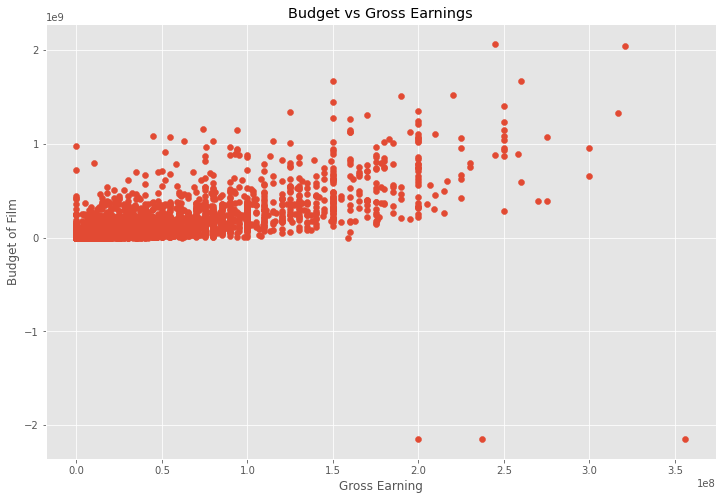

In [75]:
#scatter plot with budget vs gross 

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earning')

plt.ylabel('Budget of Film')

plt.show()



### As the budget of the film increase the total gross also increase . Positive gross value depicts profit earned by the film and negative gross value show the total loss in millions.

In [72]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States)"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)"
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,"July 19, 2019 (United States)"
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,"June 12, 2015 (United States)"
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,"May 4, 2012 (United States)"


Text(0.5, 1.0, 'Budget vs Gross Earnings')

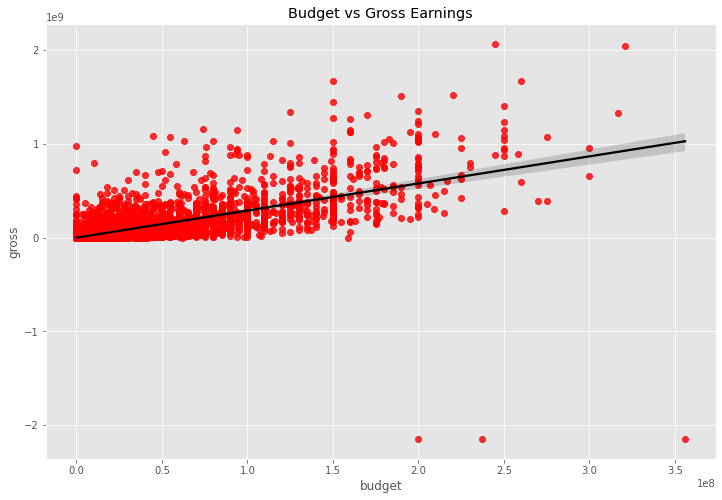

In [89]:
# Plot budget vs gross using seaborn 

sns.regplot(x='budget',y='gross',data=df, scatter_kws = {"color":"red"},line_kws = {"color":"black"})

plt.title('Budget vs Gross Earnings')

### As the budget increases the gross earning also increases . 

In [87]:
# Lets see correlation 

df.corr(method='pearson')  #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.256331,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.169154,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.573930,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.687124,0.268372
gross,0.256331,0.169154,0.573930,0.687124,1.000000,0.203616
runtime,0.116358,0.394564,0.306984,0.268372,0.203616,1.000000


In [ ]:
# High correlation between budget and gross 


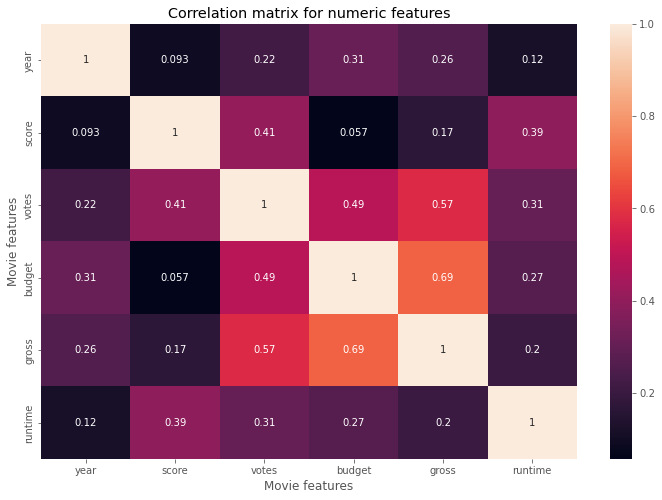

In [88]:
correlation_matrix =df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [91]:
df_numerized = df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,699
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,193
7480,6194,5,2,2019,1489,6.9,222000.0,1455,1920,677,56,260000000,1670727580,2317,118.0,1489
6653,2969,6,0,2015,1705,7.0,593000.0,517,3569,438,56,150000000,1670516444,2282,124.0,1705
6043,5502,6,0,2012,2473,8.0,1300000.0,1517,2315,2242,56,220000000,1518815515,1607,143.0,2473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,3372,4,6,2006,2393,6.3,12000.0,1563,2398,789,56,1000000,0,397,77.0,2393
7667,5394,0,10,2020,392,5.7,7.0,2165,3345,2464,45,0,0,1788,102.0,392
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,-2147483648,2254,194.0,705
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,-2147483648,1607,181.0,184


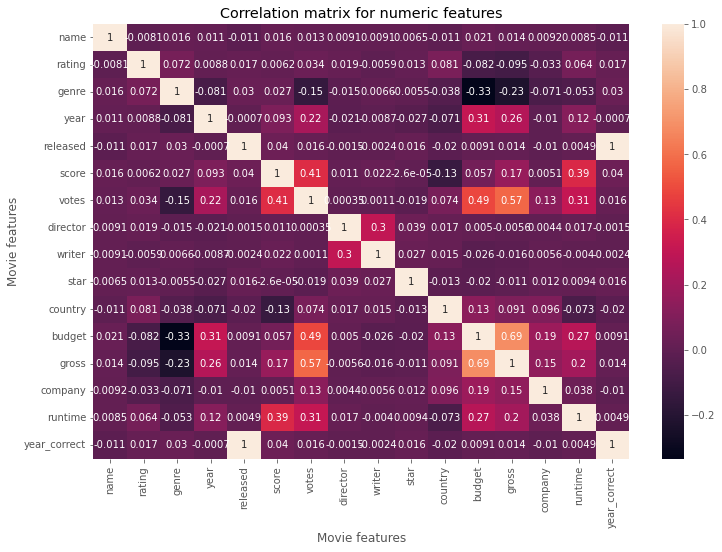

In [94]:
correlation_matrix =df_numerized.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [96]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.008483,-0.011311
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.064133,0.016613
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052914,0.029822
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.116358,-0.000695
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.014154,-0.010474,0.004852,1.000000
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.169154,0.005081,0.394564,0.039814
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.573930,0.133457,0.306984,0.015878
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017062,-0.001478
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.004036,-0.002404
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.009418,0.015777


In [97]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs


name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
                                ...   
year_correct  budget          0.009145
              gross           0.014154
              company        -0.010474
              runtime         0.004852
              year_correct    1.000000
Length: 256, dtype: float64

In [103]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs



budget        genre          -0.334021
genre         budget         -0.334021
gross         genre          -0.229534
genre         gross          -0.229534
votes         genre          -0.145296
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [104]:
high_corr = sorted_pairs[(sorted_pairs) >0.5]

high_corr






votes         gross           0.573930
gross         votes           0.573930
              budget          0.687124
budget        gross           0.687124
year_correct  released        1.000000
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      year_correct    1.000000
              released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# votes and budget have highest correlation to gross earnings 
# company has low correlation 